In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class RBM:
    def __init__(self, learning_rate=0.1):
        self.ministData = self.getMinistData()
        self.numHidden = 10
        self.numVisible = self.ministData.shape[1] # 64
        self.learningRate = 0.5
        np.random.seed(123)

        # Initialize a weight matrix, of dimensions (num_visible x num_hidden), using
        # a Gaussian distribution with mean 0 and standard deviation 0.1.
        self.weights = 0.1 * np.random.randn(self.numVisible, self.numHidden)
        # Insert weights for the bias units into the first row and first column.
        self.visibleNodeBias = np.ones(self.numVisible, dtype=float)
        self.hiddenNodeBias = np.ones(self.numHidden, dtype=float)
        self.middlelayer = 100
        self.middlelayerBias = np.ones(self.middlelayer, dtype=float)


    def activation_logistic(self, x):
        return 1.0 / (1 + np.exp(-x))

    def rmse(self, predictions, targets):
        return np.sqrt(((predictions - targets) ** 2).mean())

    def train(self, data,epochs):
        """
        to train RBM as per Hinton's "A Practical Guide to Training Restricted Boltzmann Machines"
        :param data: 
        :return: stores weights in RBM object
        """

        for epoch in range(epochs):
            numberOfData = data.shape[0]
            # forward phase
            positiveHiddenProbability = self.activation_logistic(np.dot(data, self.weights) + self.hiddenNodeBias)
            positiveHiddenStates = positiveHiddenProbability > np.random.rand(numberOfData, self.numHidden)
            
            
            


            # reconstruction phase
            # 1) Generating reconstructed data
            reconstructedData = self.activation_logistic(
                np.dot(positiveHiddenStates, self.weights.T) + self.visibleNodeBias)

            # 2) Generating reconstructed output
            reconstructedOutput = self.activation_logistic(
                np.dot(reconstructedData, self.weights) + self.hiddenNodeBias)

            # 3) calculating positive Association and negative Association
            # 3.A)  positive Association = <Vi * Hj> original
            positiveAssociation = np.dot(data.T, positiveHiddenProbability)
            # 3.B)  negative Association = <Vi * Hj> reconstructed
            negativeAssociation = np.dot(reconstructedData.T, reconstructedOutput)

            # 4) weight change
            changeInWeight = self.learningRate * ((positiveAssociation - negativeAssociation) / numberOfData)
            self.weights += 1.2 * changeInWeight

            error = np.sum((data - reconstructedData) ** 2)
            # print(" %s" % (error))

    def getHidden(self, data):
        """

        :param data: 
        :return: 
        """
        numberofSample = data.shape[0]
        output = self.activation_logistic(np.dot(data, self.weights) + self.hiddenNodeBias)
        outputStates = output > np.random.rand(numberofSample, self.numHidden)
        print (outputStates)

    def getVisible(self, data):
        """

        :param data: 
        :return: 
        """
        numberofSample = data.shape[0]
        reconstructedData = self.activation_logistic(np.dot(data, self.weights.T) + self.visibleNodeBias)
        data = reconstructedData > np.random.rand(numberofSample, self.numVisible)
        print data

    def dreaming(self, numberOfTimes):
        """
        :return: 
        """
        samples = np.ones((numberOfTimes, self.numVisible))
        sample = samples[0]
        for sampleno in range(numberOfTimes):
            # forward pass
            positiveHiddenProbability = self.activation_logistic(np.dot(sample, self.weights) + self.hiddenNodeBias)
            positiveHiddenStates = positiveHiddenProbability > np.random.rand(1, self.numHidden)

            # reconstruction phase
            # 1) Generating reconstructed data
            reconstructedData = self.activation_logistic(
                np.dot(positiveHiddenStates, self.weights.T) + self.visibleNodeBias)

            reconstructedStates = reconstructedData > np.random.rand(self.numVisible)
            # print reconstructedStates
            sample = reconstructedStates
            samples[sampleno] = reconstructedStates
        return samples
    def getMinistData(self):
        digits = datasets.load_digits()
        flatten = []
        for eachDigit in digits['images']:
            temp = []
            for eachrow in eachDigit:
                temp.extend(eachrow)
            flatten.append(temp)
        return np.asarray(flatten,dtype='int8')

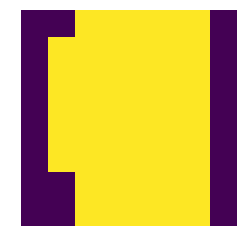

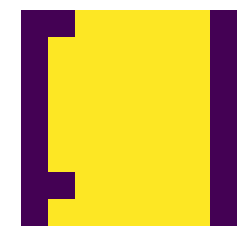

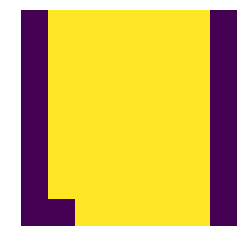

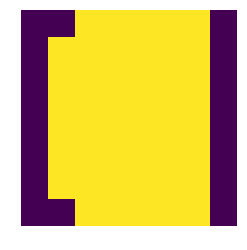

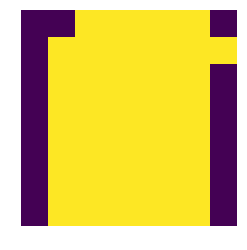

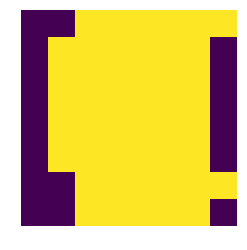

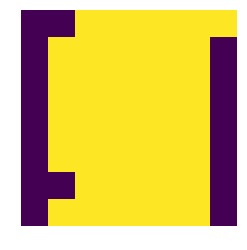

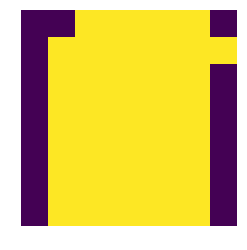

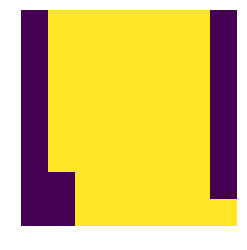

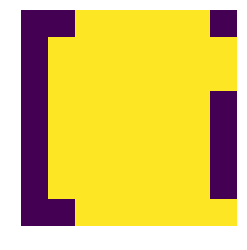

In [6]:
if __name__ == '__main__':
    r = RBM(learning_rate=0.5)
    training_data = r.ministData
    r.train(training_data,epochs = 5000)
    # # print r.weights
    # # user = np.array([[0, 0, 0, 1, 1, 0]])
    # # r.getHidden(user)
    # # user = np.array([[1, 0]])
    # # r.getVisible(user)
    dream =  r.dreaming(10)
    for deamNo in range(len(dream)):
        temp = dream[deamNo]
        temp = np.reshape(np.asarray(temp),(8,8))
    
        fig = plt.figure(frameon=False)
        # setting image size
        fig.set_size_inches(3, 3)
        # setting image axis to off (not to show axis)
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        # creating columns inside html
        plt.axis('off')
        ax.imshow(temp.squeeze(), interpolation='nearest', aspect='normal')# ,interpolation='nearest'
        plt.savefig(str(deamNo)+".jpg")